In [25]:
import pickle
import boris_extraction as boris
import multirecording_spikeanalysis as spike
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import sem
from itertools import combinations
def hex_2_rgb(hex_color): # Orange color
    rgb_color = tuple(int(hex_color[i:i+2], 16) / 255.0 for i in (1, 3, 5))
    return rgb_color

def pickle_this(thing_to_pickle, file_name):
    """
    Pickles things
    Args (2):   
        thing_to_pickle: anything you want to pickle
        file_name: str, filename that ends with .pkl 
    Returns:
        none
    """
    with open(file_name,'wb') as file:
        pickle.dump(thing_to_pickle, file)

def unpickle_this(pickle_file):
    """
    Unpickles things
    Args (1):   
        file_name: str, pickle filename that already exists and ends with .pkl
    Returns:
        pickled item
    """
    with open(pickle_file, 'rb') as file:
        return(pickle.load(file))

In [26]:
behavior_dicts = unpickle_this('behavior_dicts.pkl')


In [27]:
event_info = {}
sniff_itis = []
j = 0
total_sniffs = 0
for behavior_dict in behavior_dicts:
    event_dict_keys = behavior_dict.keys()
    for event, events in behavior_dict.items():
        no_events = events.shape[0]
        sniff_length = 0
        for i in range(len(events)):
            sniff_length_temp = events[i][1] - events[i][0]
            sniff_length = sniff_length + sniff_length_temp
            total_sniffs = total_sniffs + 1
            try:
                sniff_iti = events[i+1][0] - events[i][1]
                sniff_itis.append(sniff_iti)
            except IndexError:
                pass
        total_sniff_time = sniff_length/1000
        try:
            avg_event = sniff_length/no_events/1000
        except ZeroDivisionError:
            avg_event = 0
        if j in event_info.keys():
            dict_event = event_info[j]
            dict_event[event] =  {'no_events': no_events, 'avg event': avg_event, 'total time': total_sniff_time}
            event_info[j] =  dict_event
        else:
            event_info[j] = {event: {'no_events': no_events, 'avg event': avg_event,'total time': total_sniff_time }}
    j += 1
sniff_itis = np.array(sniff_itis)/1000
sniff_itis 
overlapping_sniffs = 0 
for i in range(len(sniff_itis)):
    if sniff_itis[i] < 3:
        overlapping_sniffs = overlapping_sniffs + 1
print(overlapping_sniffs) # was 54 with old thresholding for less than 2, 142 for 5
print(total_sniffs) # out of 524, after fixing 83 for 5 
# out of 465

160
907


In [29]:
event_overview = pd.concat({k: pd.DataFrame(v) for k, v in event_info.items()}, axis=0)
event_overview = event_overview.reset_index()
event_dict_keys
event_overview.groupby('level_1').mean()

,level_0,cup 1,cup 2,cup 3,cup 4,acquisition,cagemate,empty,novel,familiar
level_1,,,,,,,,,,
avg event,4.0,4.026578,3.383947,4.754109,3.699214,7.205837,6.972043,2.993848,4.859613,4.123707
no_events,4.0,11.222222,10.000000,10.888889,11.333333,14.888889,14.444444,5.666667,12.444444,9.888889
total time,4.0,55.328333,58.036778,63.876000,52.556111,105.693444,100.475111,18.101222,51.897667,44.349778


In [20]:
event_total_time = event_overview[event_overview['level_1'] == 'total time']
event_cup_time_averages = {}
for event in event_dict_keys:
    if 'cup' in event:
        avg_event = event_total_time[event].mean()
        event_cup_time_averages[event] = avg_event
event_cup_time_averages

{'cup 1': 58.79500000000006,
 'cup 2': 60.83244444444443,
 'cup 3': 65.847888888889,
 'cup 4': 55.14855555555558}

In [21]:
event_total_time = event_overview[event_overview['level_1'] == 'total time']
event_agent_time_averages = {}
for event in event_dict_keys:
    if 'cup' not in event:
        avg_event = event_total_time[event].mean()
        event_agent_time_averages[event] = avg_event
event_agent_time_averages

{'acquisition': 109.11377777777778,
 'cagemate': 104.32633333333351,
 'empty': 18.260444444444524,
 'novel': 55.590222222222195,
 'familiar': 46.66233333333325}

Text(0, 0.5, 'Total sniff (s)')

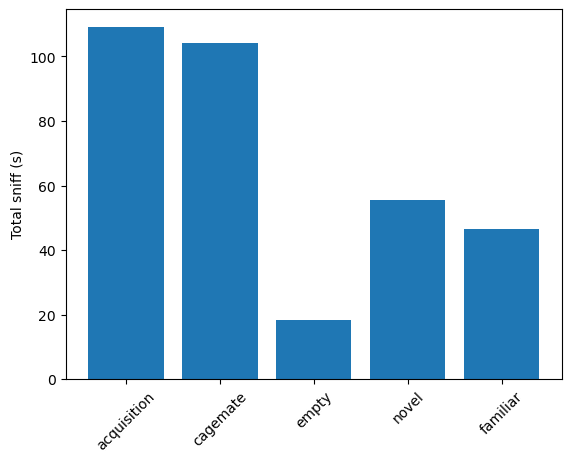

In [22]:
plt.bar(event_agent_time_averages.keys(), event_agent_time_averages.values())
plt.xticks(rotation=45)
plt.ylabel('Total sniff (s)')

Text(0, 0.5, 'Total sniff (s)')

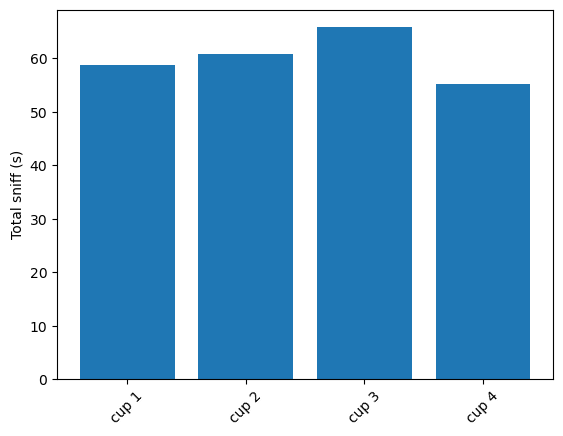

In [24]:
plt.bar(event_cup_time_averages.keys(), event_cup_time_averages.values())
plt.xticks(rotation=45)
plt.ylabel('Total sniff (s)')